# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_loan=pd.read_csv('loan_prediction.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


IMPUTER

In [3]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df_loan.values)
df=imp.transform(df_loan)
df_loan=pd.DataFrame(df)
df_loan

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0,120,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


LABEL ENCODING

In [4]:
le=LabelEncoder()
list=[0,1,2,4,5,11,12]
for val in list:
    df_loan[val]=le.fit_transform(df_loan[val].astype(str))
df_loan

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0,71,360,1,0,1
610,610,1,1,3,0,0,4106,0,40,180,1,0,1
611,611,1,1,1,0,0,8072,240,253,360,1,2,1
612,612,1,1,2,0,0,7583,0,187,360,1,2,1


# EXPLORATORY DATA ANALYSIS

In [5]:
df_loan.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1


In [6]:
df_loan.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
609,609,0,0,0,0,0,2900,0,71,360,1,0,1
610,610,1,1,3,0,0,4106,0,40,180,1,0,1
611,611,1,1,1,0,0,8072,240,253,360,1,2,1
612,612,1,1,2,0,0,7583,0,187,360,1,2,1
613,613,0,0,0,0,1,4583,0,133,360,0,1,0


In [7]:
df_loan.shape

(614, 13)

In [8]:
df_loan.dtypes

0      int32
1      int32
2      int32
3     object
4      int32
5      int32
6     object
7     object
8     object
9     object
10    object
11     int32
12     int32
dtype: object

In [9]:
list=[3,6,7,8,9,10]
for i in list:
    df_loan[i] = df_loan[i].astype(str).astype(float)
df_loan.dtypes

0       int32
1       int32
2       int32
3     float64
4       int32
5       int32
6     float64
7     float64
8     float64
9     float64
10    float64
11      int32
12      int32
dtype: object

In [10]:
df_loan.columns

RangeIndex(start=0, stop=13, step=1)

In [11]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
0     614 non-null int32
1     614 non-null int32
2     614 non-null int32
3     614 non-null float64
4     614 non-null int32
5     614 non-null int32
6     614 non-null float64
7     614 non-null float64
8     614 non-null float64
9     614 non-null float64
10    614 non-null float64
11    614 non-null int32
12    614 non-null int32
dtypes: float64(6), int32(7)
memory usage: 45.7 KB


In [12]:
df_loan.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245928,145.465798,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248406,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Data in the columns 6, 7, 8 and 9 do not appear to have normal distribution. Data in all other columns appear to have normal distribution (mean close to 50th percentile).

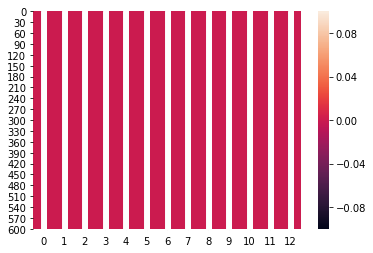

In [13]:
sns.heatmap(df_loan.isnull(),annot=True)

In [14]:
df_loan.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

CHECKING DATA SKEWNESS

In [15]:
df_loan.skew()

0     0.000000
1    -1.648795
2    -0.644850
3     1.015551
4     1.367622
5     2.159796
6     6.539513
7     7.491531
8     2.745407
9    -2.402112
10   -2.021971
11   -0.066196
12   -0.809998
dtype: float64

REMOVING DATA SKEWNESS

In [16]:
for col in df_loan.columns:
    if df_loan.skew().loc[col]>0.55:
        df_loan[col]=np.log1p(df_loan[col])
df_loan.skew()

0     0.000000
1    -1.648795
2    -0.644850
3     0.671985
4     1.367622
5     2.159796
6     0.482128
7    -0.173065
8    -0.137460
9    -2.402112
10   -2.021971
11   -0.066196
12   -0.809998
dtype: float64

CHECKING OUTLIERS

In [17]:
z=np.abs(zscore(df_loan))
print(z.shape)
print(np.where(z>3))

(614, 13)
(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       555, 561, 568, 575, 585, 600], dtype=int64), array([8, 9, 9, 8, 9, 8, 8, 9, 6, 8, 6, 8, 6, 6, 6, 9, 9, 9, 6, 8, 6, 6,
       6, 9, 9, 9, 8, 8, 8, 9, 9, 6], dtype=int64))


REMOVING OUTLIERS

In [18]:
df_final=df_loan.loc[(z<3).all(axis=1)]
print(df_final.shape)

(587, 13)


In [19]:
df_final.skew()

0     0.000640
1    -1.665014
2    -0.634128
3     0.699527
4     1.345024
5     2.213013
6     0.522044
7    -0.197124
8     0.076623
9    -2.125652
10   -1.985260
11   -0.054364
12   -0.814869
dtype: float64

BOXPLOT

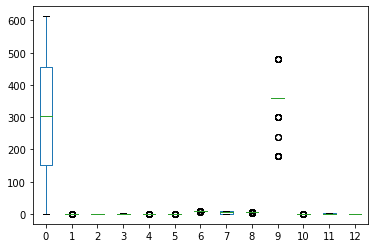

In [20]:
df_final.plot.box()

CORRELATION

In [21]:
df_final.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.005626,-0.014334,0.053614,0.046919,0.051161,0.034838,-0.031678,0.038208,-0.022138,-0.036736,-0.159486,0.026942
1,-0.005626,1.000000,0.371416,0.190619,0.047731,-0.003641,0.049883,0.236223,0.160570,-0.102224,0.016074,-0.021046,0.009121
2,-0.014334,0.371416,1.000000,0.352178,0.020657,-0.004878,0.001504,0.324895,0.191628,-0.125863,0.016260,0.014883,0.085557
3,0.053614,0.190619,0.352178,1.000000,0.055103,0.072697,0.122764,0.016404,0.150127,-0.091877,-0.023767,0.012991,0.007928
4,0.046919,0.047731,0.020657,0.055103,1.000000,-0.010160,-0.182252,0.049751,-0.145461,-0.093574,-0.077740,-0.067525,-0.092751
5,0.051161,-0.003641,-0.004878,0.072697,-0.010160,1.000000,0.193255,-0.078980,0.115775,-0.030284,-0.010510,-0.034281,-0.025269
6,0.034838,0.049883,0.001504,0.122764,-0.182252,0.193255,1.000000,-0.371871,0.494753,-0.057251,0.047730,-0.039505,-0.009139
7,-0.031678,0.236223,0.324895,0.016404,0.049751,-0.078980,-0.371871,1.000000,0.170193,0.004480,0.001843,-0.055180,0.066157
8,0.038208,0.160570,0.191628,0.150127,-0.145461,0.115775,0.494753,0.170193,1.000000,0.067779,0.003835,-0.101834,-0.034215
9,-0.022138,-0.102224,-0.125863,-0.091877,-0.093574,-0.030284,-0.057251,0.004480,0.067779,1.000000,0.027747,-0.056662,-0.020837


PAIRPLOT

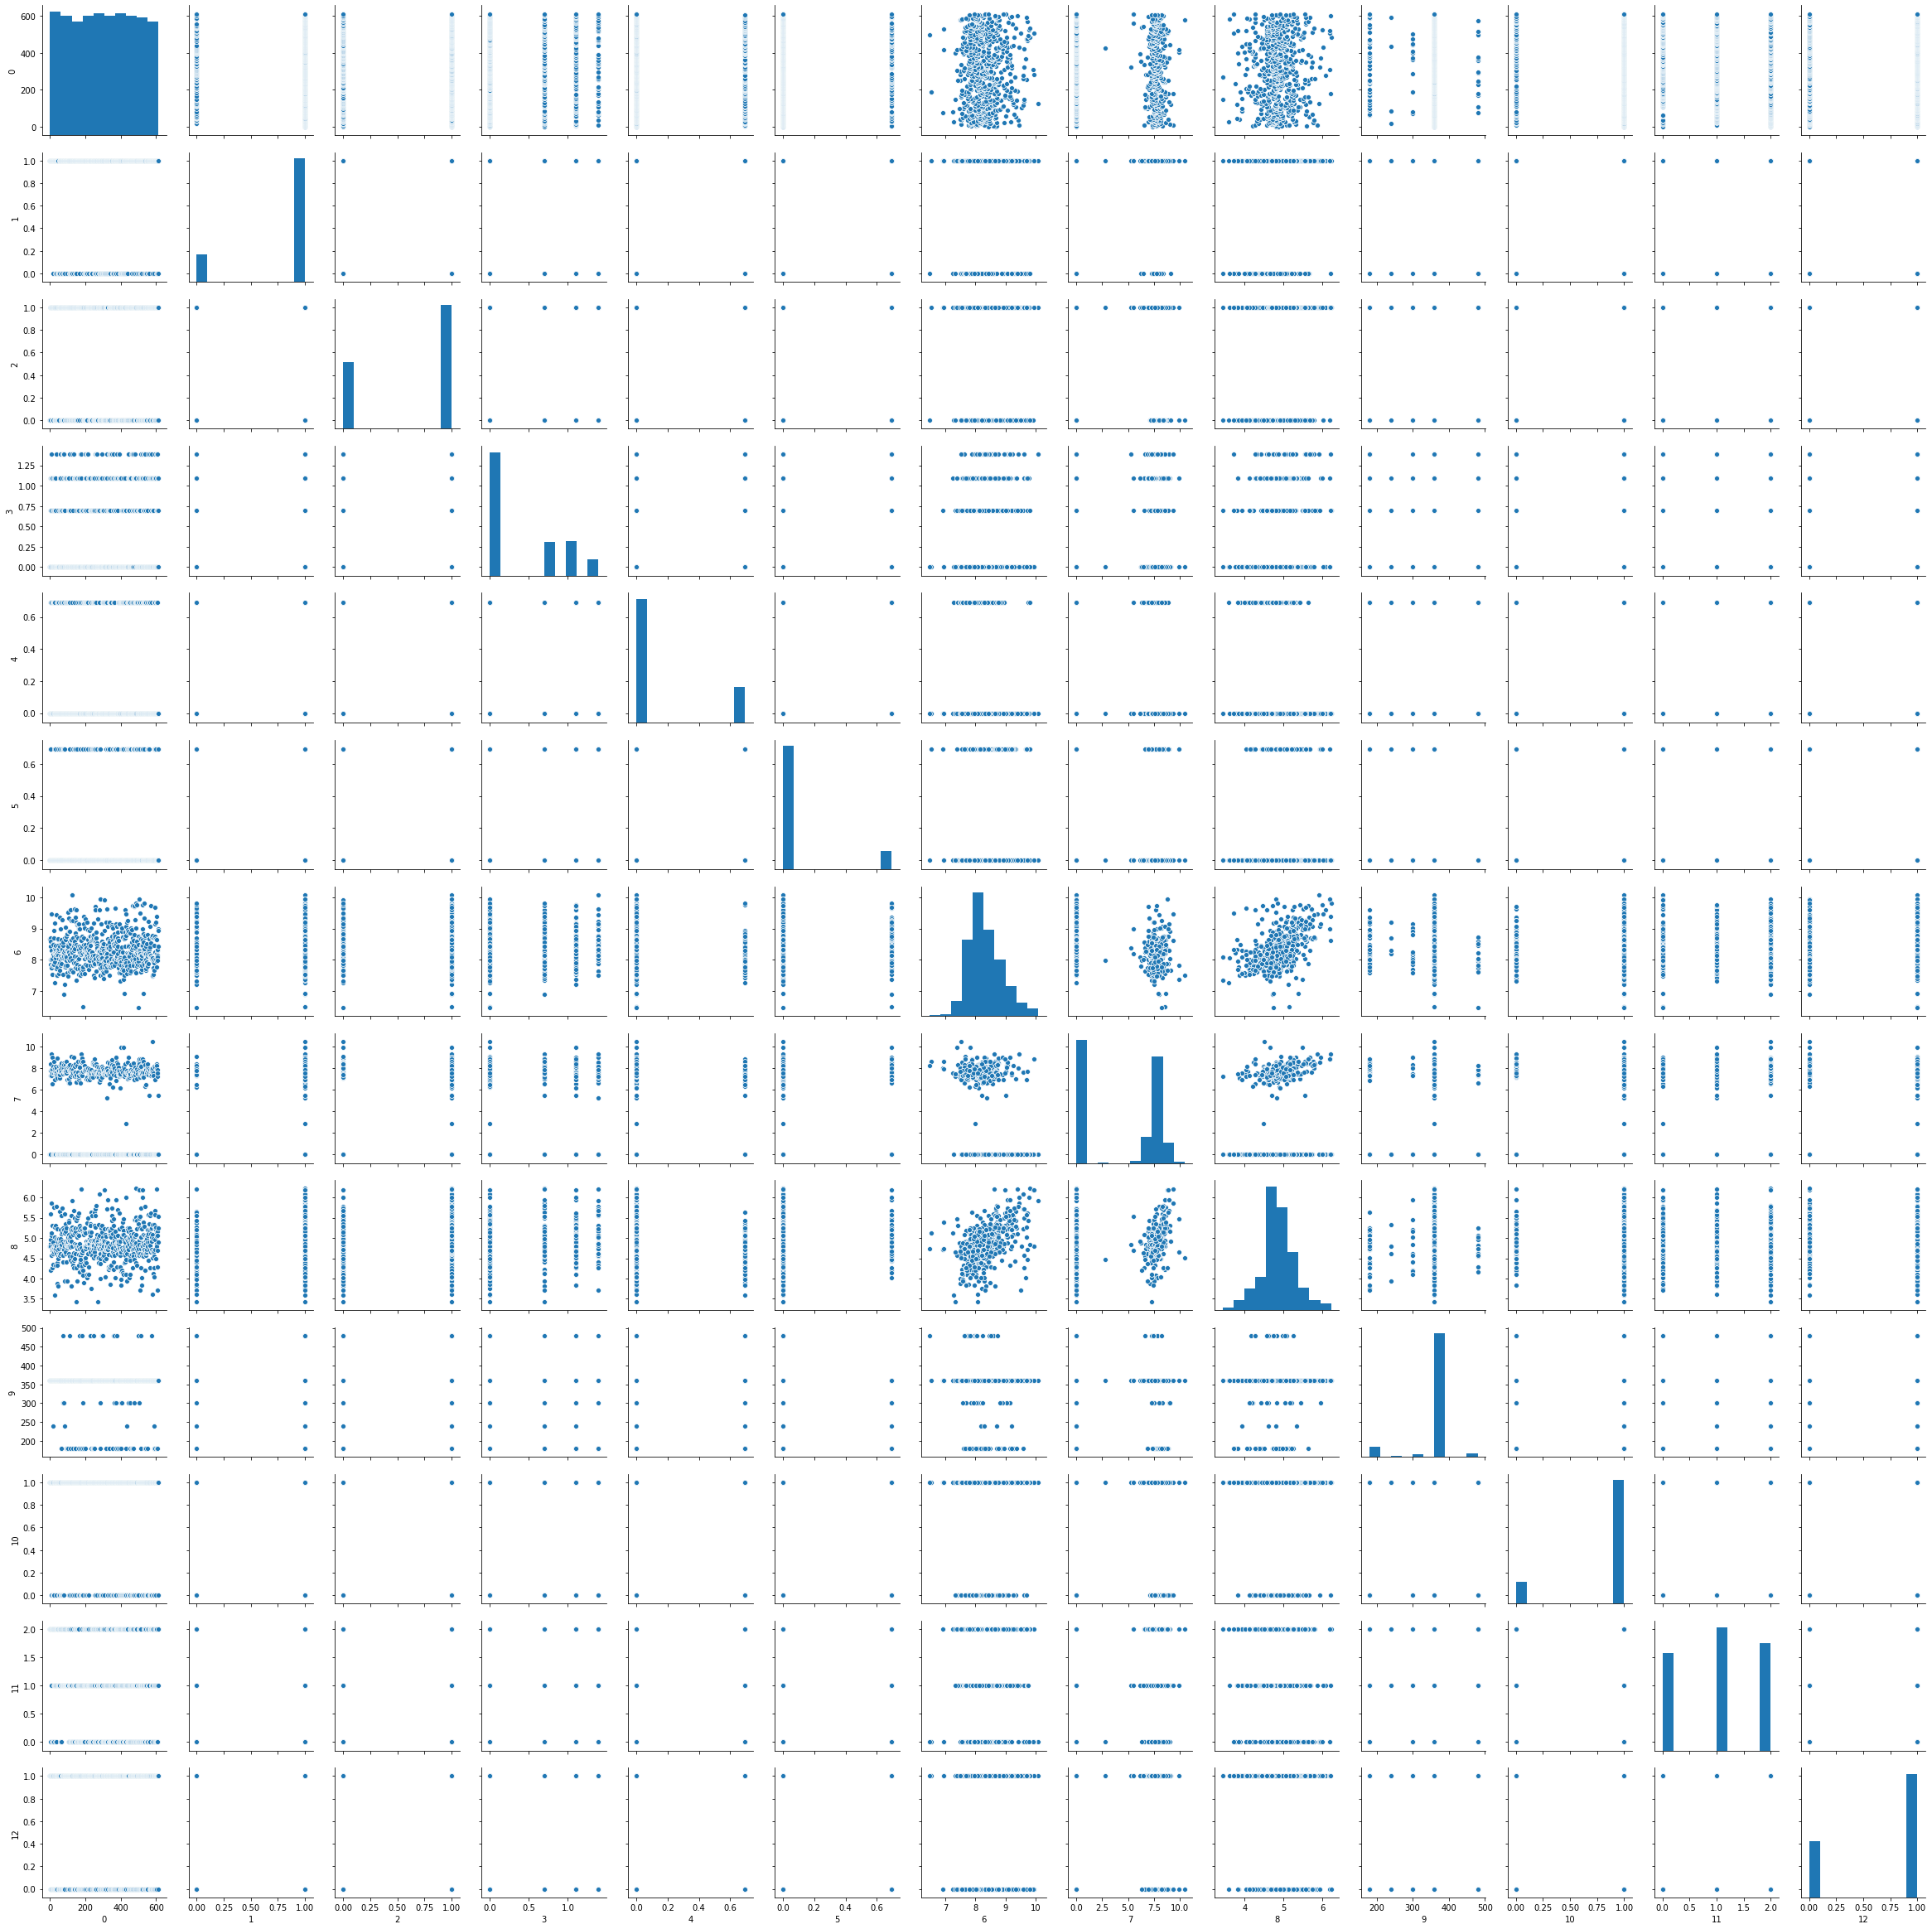

In [22]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [23]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

       0  1  2         3         4         5         6         7         8  \
0      0  1  0  0.000000  0.000000  0.000000  8.674197  0.000000  4.795791   
1      1  1  1  0.693147  0.000000  0.000000  8.430327  7.319202  4.859812   
2      2  1  1  0.000000  0.000000  0.693147  8.006701  0.000000  4.204693   
3      3  1  1  0.000000  0.693147  0.000000  7.857094  7.765993  4.795791   
4      4  1  0  0.000000  0.000000  0.000000  8.699681  0.000000  4.955827   
..   ... .. ..       ...       ...       ...       ...       ...       ...   
609  609  0  0  0.000000  0.000000  0.000000  7.972811  0.000000  4.276666   
610  610  1  1  1.386294  0.000000  0.000000  8.320448  0.000000  3.713572   
611  611  1  1  0.693147  0.000000  0.000000  8.996280  5.484797  5.537334   
612  612  1  1  1.098612  0.000000  0.000000  8.933796  0.000000  5.236442   
613  613  0  0  0.000000  0.000000  0.693147  8.430327  0.000000  4.897840   

         9   10  11  
0    360.0  1.0   2  
1    360.0  1.0   0

In [24]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10,stratify=y)

In [26]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(410, 12) (177, 12)
(410,) (177,)


CLASSIFIERS

In [27]:
knn=KNeighborsClassifier(n_neighbors=10)
sv=SVC()
dtc=DecisionTreeClassifier(random_state=10)
lr=LogisticRegression()
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [28]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('DecisionTreeClassifier',dtc))
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))

FUNCTION DECLARATION

************* KNeighborsClassifier *************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score =  0.5932203389830508


cross_val_score =  0.5838671342294954


roc_auc_score =  0.4652757078986588


classification_report
               precision    recall  f1-score   support

           0       0.23      0.13      0.16        55
           1       0.67      0.80      0.73       122

    accuracy                           0.59       177
   macro avg       0.45      0.47      0.45       177
weighted avg       0.53      0.59      0.55       177



[[ 7 48]
 [24 98]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************* SVC *************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state

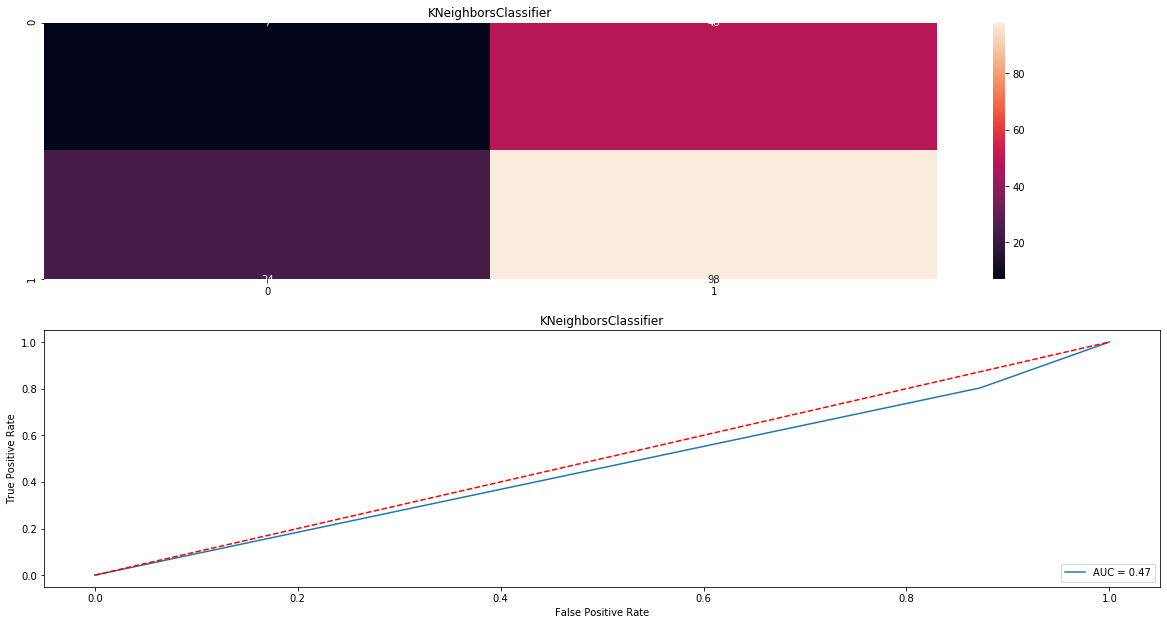

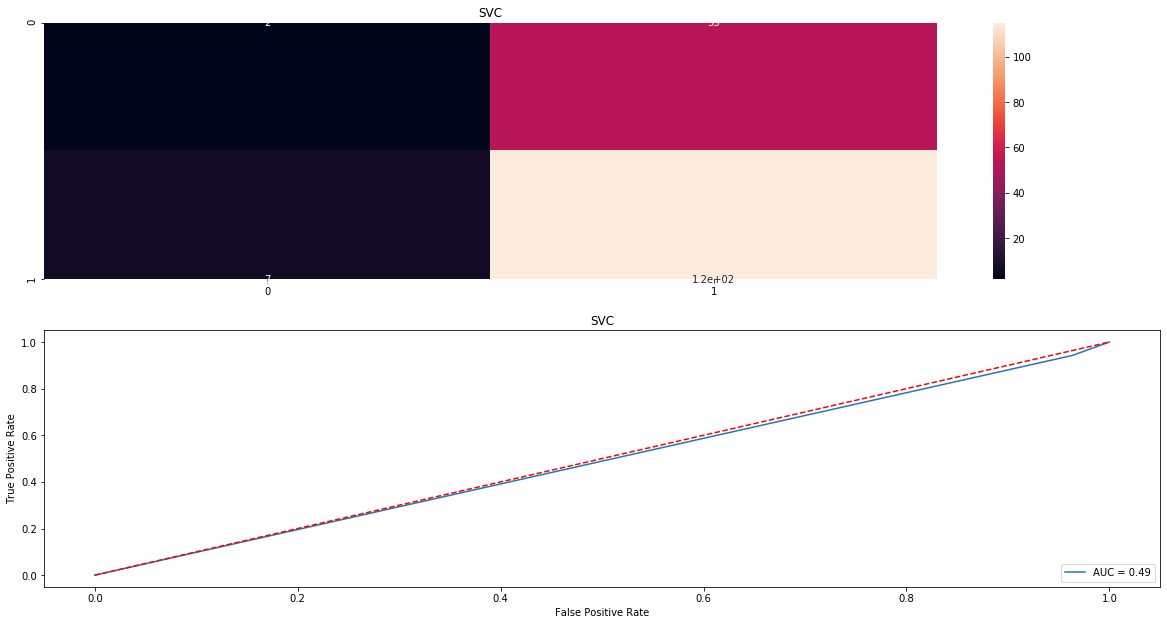

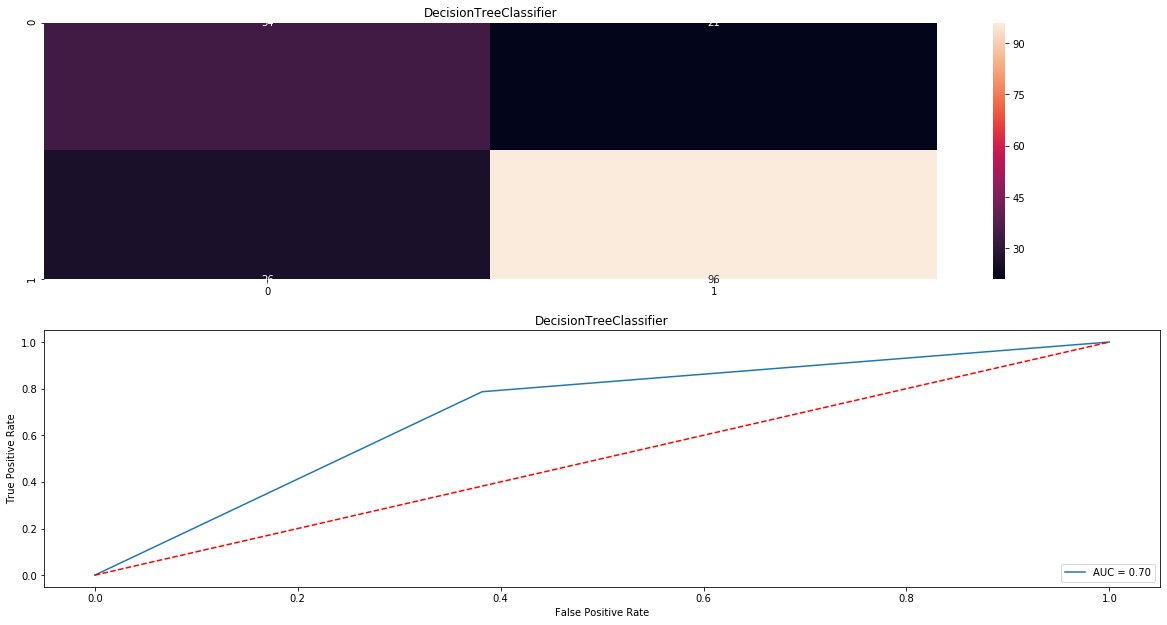

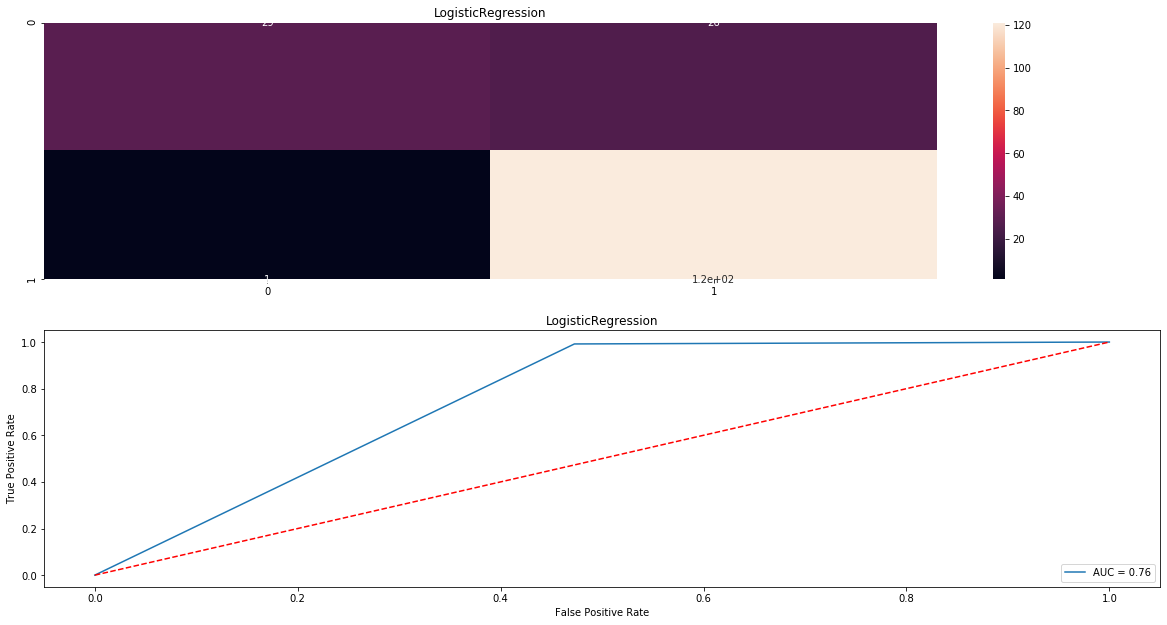

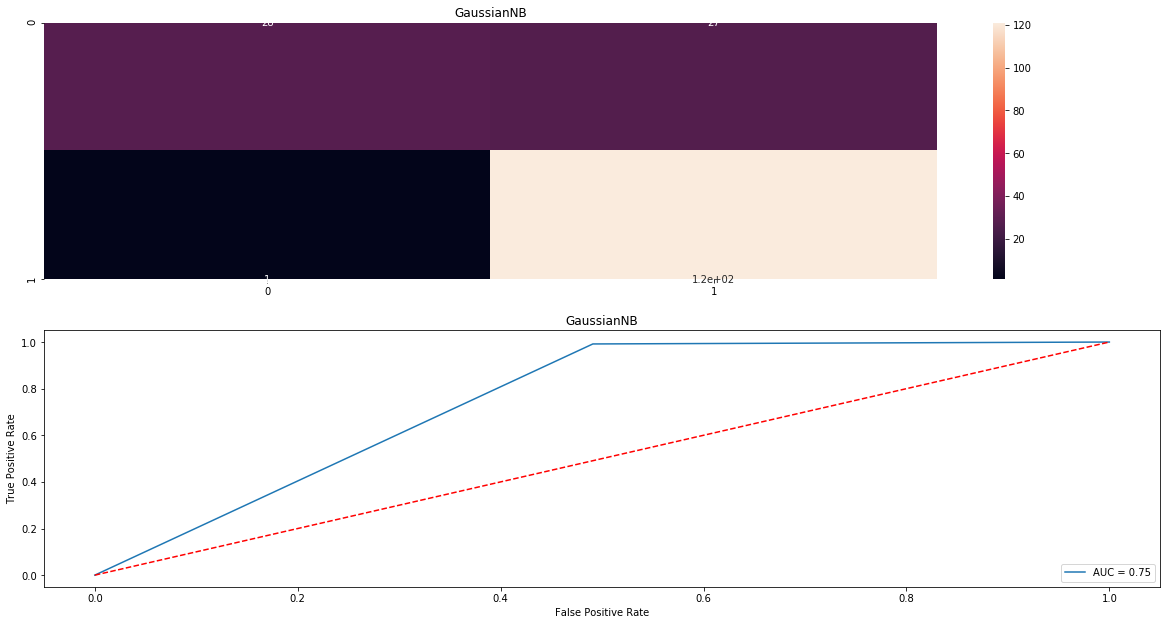

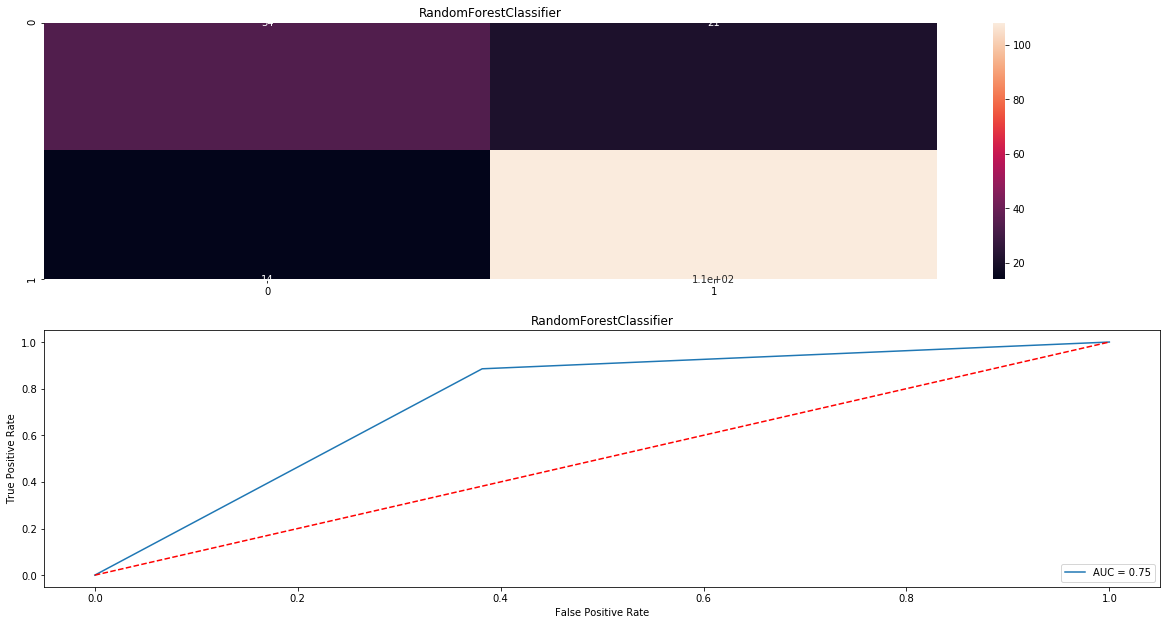

In [29]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************',name,'*************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.astype('int'))
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,y_pred)
    print('Accuracy Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,y_pred))
    print('\n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(20,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# BEST MODEL

In [30]:
result=pd.DataFrame({'Model ':Model,'Accuracy Score ':score,'Cross_Val_Score':cvs})
result

,Model,Accuracy Score,Cross_Val_Score
0,KNeighborsClassifier,59.322034,58.386713
1,SVC,66.101695,66.319891
2,DecisionTreeClassifier,73.446328,68.072764
3,LogisticRegression,84.745763,81.621274
4,GaussianNB,84.180791,81.621274
5,RandomForestClassifier,80.225989,72.707676


I choose Logistic Regression for this dataset.

# PICKLE

In [31]:
joblib.dump(lr,'loan.pkl')

['loan.pkl']